In [2]:
%matplotlib nbagg
import jungfrau_utils as ju
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from scipy.special import erf
from scipy.optimize import curve_fit
import os

In [3]:

#DIR = "/sf/alvra/data/p17569/raw/RHO/"
DIR = "/sf/alvra/data/p17569/res/scan_data/YAG_0.1_jet_LAMcheck_040/"
#DIR = "/sf/alvra/data/p17589/raw/"
#DIR = "/sf/alvra/data/p17569/raw/BR/"

!ls -lah -rt /sf/alvra/data/p17569/res/scan_data/YAG_0.1_jet_LAMcheck_040/
#!ls -lah -t /sf/alvra/data/p17589/raw/
#!ls -lah -t /sf/alvra/data/p17569/raw/RHO/

!hostname

listfile = os.listdir(DIR)
number_files = len(listfile)
print ("There are",number_files,"files in the folder", DIR)

total 1.1G
-rw-r--r--.   1 root  p17569  51M Dec 15 15:05 YAG_0.1_jet_LAMcheck_040_step0000.h5
-rw-r--r--.   1 root  p17569  51M Dec 15 15:05 YAG_0.1_jet_LAMcheck_040_step0001.h5
-rw-r--r--.   1 root  p17569  51M Dec 15 15:06 YAG_0.1_jet_LAMcheck_040_step0002.h5
-rw-r--r--.   1 root  p17569  52M Dec 15 15:07 YAG_0.1_jet_LAMcheck_040_step0003.h5
-rw-r--r--.   1 root  p17569  51M Dec 15 15:08 YAG_0.1_jet_LAMcheck_040_step0004.h5
-rw-r--r--.   1 root  p17569  53M Dec 15 15:08 YAG_0.1_jet_LAMcheck_040_step0005.h5
-rw-r--r--.   1 root  p17569  52M Dec 15 15:09 YAG_0.1_jet_LAMcheck_040_step0006.h5
-rw-r--r--.   1 root  p17569  51M Dec 15 15:10 YAG_0.1_jet_LAMcheck_040_step0007.h5
-rw-r--r--.   1 root  p17569  52M Dec 15 15:11 YAG_0.1_jet_LAMcheck_040_step0008.h5
-rw-r--r--.   1 root  p17569  52M Dec 15 15:11 YAG_0.1_jet_LAMcheck_040_step0009.h5
-rw-r--r--.   1 root  p17569  51M Dec 15 15:12 YAG_0.1_jet_LAMcheck_040_step0010.h5
-rw-r--r--.   1 root  p17569  51M Dec 15 15:13 YAG_0.1_jet_LAMche

## SET THE CHANNELS IN THE NEXT CELL

In [4]:
channel_PIPS_trans = "SARES11-GES1:CH1_VAL_GET/data"           #X-ray diode to PRIME Keysight
channel_Izero = "SARES11-LSCP10-FNS:CH3:VAL_GET/data"          #Izero diode to PRIME Ioxos (channel 3)
channel_Izero2 = "SARES11-LSCP10-FNS:CH0:VAL_GET/data"          #Izero diode to PRIME Ioxos (channel 0)
channel_Izero3 = "SARES11-LSCP10-FNS:CH1:VAL_GET/data"          #Izero diode to PRIME Ioxos (channel 1)
channel_Izero4 = "SARES11-LSCP10-FNS:CH2:VAL_GET/data"         #Izero diode to PRIME Ioxos (channel 2)
channel_LaserDiode = "SLAAR11-LSCP1-FNS:CH0:VAL_GET/data"      #Laser diode to ESA Laser Ioxos 
channel_Laser_refDiode = "SLAAR11-LSCP1-FNS:CH2:VAL_GET/data"  #Laser diode leaking from beampath, to ESA Laser Ioxos 
#channel_LaserDiode = "SARES11-GES1:CH2_VAL_GET/data"          #Laser diode to PRIME Keysight
channel_pulse_ids = "SLAAR11-LMOT-M451:ENC_1_BS/pulse_id"      #Pulse ids taken from pump-probe delay stage (100 Hz)
channel_delay = "SLAAR11-LMOT-M451:ENC_1_BS/data"              #Delay of pump-probe delay stage
channel_LAM_delaystage = "SLAAR11-LTIM01-EVR0:DUMMY_PV2_NBS/data"       #LAM internal stage position in mm
channel_LAM_stepper = "SLAAR11-LTIM01-EVR0:DUMMY_PV10_NBS/data"         #LAM stepper motor (used for feedback)
channel_PALM_eTOF = "SAROP11-PALMK118:CH2_BUFFER/data"                 #PALM eTof from Ch2
channel_PALM_drift = "SAROP11-PALMK118:CH2_VAL_GET/data"               #PALM drift

In [5]:
#fileName = "YAG_0.1_jet_LAM_015_step0000.h5"
fileName = "YAG_0.1_jet_LAMcheck_040_step0000.h5"

BS_file = h5py.File(DIR + fileName)
#print(list(BS_file["data"].keys()))
print(DIR + fileName)

PIPS_trans = BS_file[channel_PIPS_trans]         

Izero = BS_file[channel_Izero]
LaserDiode = BS_file[channel_LaserDiode]   
LaserRefDiode = BS_file[channel_Laser_refDiode] 
pulse_ids = BS_file[channel_pulse_ids]

#LAM_internalStage = BS_file[channel_LAM_delaystage]
#LAM_stepperStage = BS_file[channel_LAM_stepper]
PALM_eTOF = BS_file[channel_PALM_eTOF]
PALM_drift = BS_file[channel_PALM_drift]
print (pulse_ids[0])

/sf/alvra/data/p17569/res/scan_data/YAG_0.1_jet_LAMcheck_040/YAG_0.1_jet_LAMcheck_040_step0000.h5
7351575024


<IPython.core.display.Javascript object>


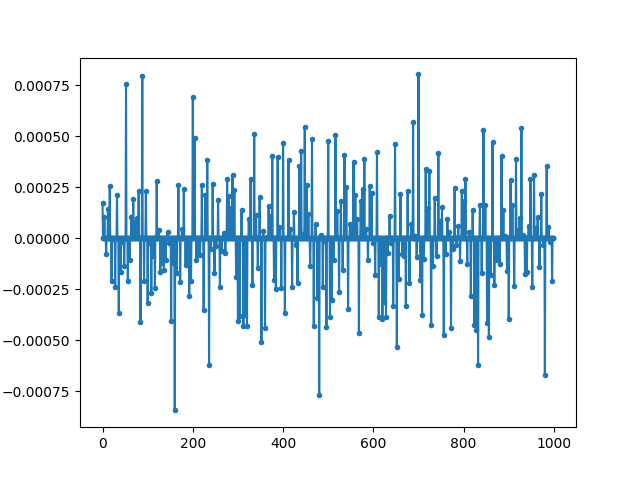

In [6]:
plt.figure()
plt.plot(PALM_drift,marker='.')
#plt.xlim([400, 800])
plt.show()

<IPython.core.display.Javascript object>


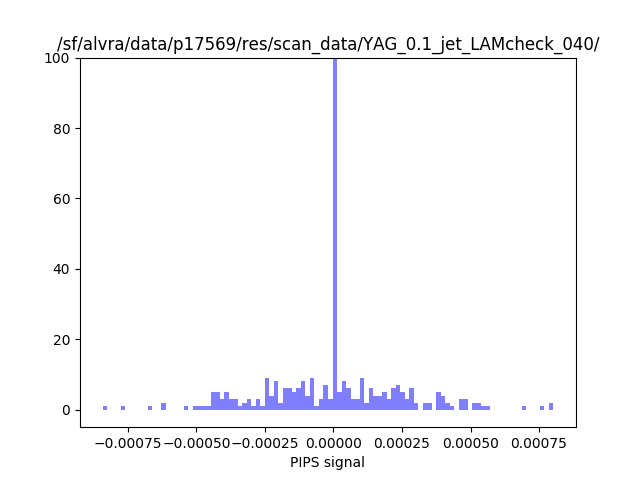

In [8]:
num_bins = 100
plt.figure()
plt.hist(PALM_drift, num_bins, facecolor='blue', alpha=0.5)
plt.title(DIR)
plt.xlabel("PIPS signal")
#plt.xlim([-40, 0])
plt.ylim([-5, 100])

plt.show()

<IPython.core.display.Javascript object>


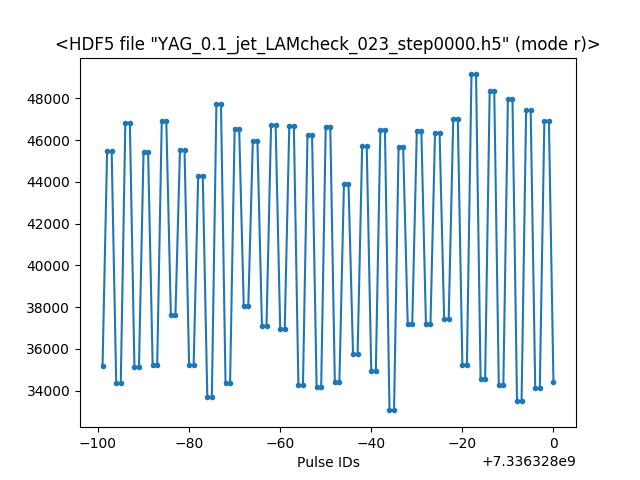

7336327901 7336328000


In [49]:
plt.figure()
plt.plot(pulse_ids, LaserDiode, marker='.')
#plt.plot(pulse_ids-pulse_ids[0], LaserDiode, marker='.')

plt.title(BS_file)
plt.xlabel("Pulse IDs")
plt.show()
print (pulse_ids[0],pulse_ids[-1])

<IPython.core.display.Javascript object>


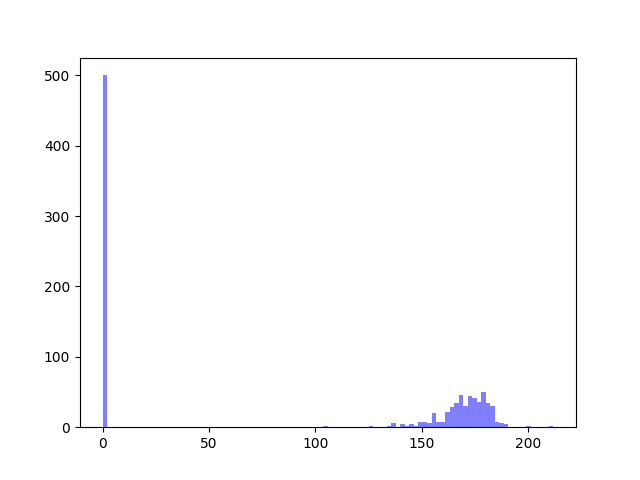

In [9]:
num_bins = 100
plt.figure()
plt.hist(Izero[:], num_bins, facecolor='blue', alpha=0.5)
plt.show()

#### Check the pattern of the pulse Ids in the H5 file. Depending how the modulo is set in bs config and to which event rate the ADC is triggered, zero (or copied values) are written in between real data.

#### Make pulse ID masks to sort out only real shots and also to distinguish FEL-on & FEL-off 

#### This is a script for laser at double reprate as FEL (laser 50 Hz, FEL 25 Hz), because FEL is the pump and laser is the probe.
First we check that the pattern is ok. 

In [12]:
#pulse_ids[0:40] % 20 == 0  # False = laser off -- this is for RepRate 5 (laser)
pulse_ids[0:40] % 4 == 0  # True = FEL shot -- this is for RepRate 25 (FEL)
pulse_ids[0:40] % 2 == 0  # False = laser off -- this is for RepRate 50 (laser)

array([ True, False,  True, False,  True, False,  True, False,  True,
       False,  True, False,  True, False,  True, False,  True, False,
        True, False,  True, False,  True, False,  True, False,  True,
       False,  True, False,  True, False,  True, False,  True, False,
        True, False,  True, False])

Now we write the masks (these 2 operations are anyway repeated in the loop script below)

In [13]:
#FEL_on_off = pulse_ids[:] % 20 == 0 # True = FEL shot (can be with or without laser) -- this is for RepRate 5 (FEL)
FEL_on_off = pulse_ids[:] % 4 == 0 # True = FEL shot (can be with or without laser) -- this is for RepRate 25 (FEL)

#FEL_on_off_2 = pulse_ids[:] % 10 == 0 #-- this is for RepRate 10 (laser)
FEL_on_off_2 = pulse_ids[:] % 2 == 0 #-- this is for RepRate 50 (laser)

In [11]:
print(pulse_ids.size)

100


In [37]:
### this is now to loop over SEVERAL FILES

fileName_root = 'YAG_0.1_jet_LAM_001'
Int_threshold = 50

listfile = os.listdir(DIR)
number_files = int(len(listfile))
#number_files = 17

print ("Start processing",number_files,"files")


Delay_x = []
laser_pumped = []
err_laser_pumped = []
laser_unpumped = []
err_laser_unpumped = []
#FEL_on = []
#err_FEL_on = []
#FEL_off = []
#err_FEL_off = []
Izero_pumped = []
err_Izero_pumped = []
Izero_unpumped = []
err_Izero_unpumped = []

for j in range(number_files):

    n_ok = 0
    n_empty = 0
    n_pumped = 0
    n_unpumped = 0
    laser_pumped_loop = []
    laser_unpumped_loop = []
    FEL_on_loop = []
    FEL_off_loop = []
    Izero_pumped_loop =[]
    Izero_unpumped_loop =[]
    
    if j < 10:
        fileName_bs = fileName_root + "_step000" + str(j) + ".h5"
    else:
        fileName_bs = fileName_root + "_step00" + str(j) + ".h5"
    bs_file = h5py.File(DIR + fileName_bs, 'r')
    #PIPS_fluo = bs_file["data/SLAAR11-LSCP1-FNS:CH2:VAL_GET/data"]
    pulse_ids = bs_file[channel_pulse_ids]
    Delay_loop = bs_file[channel_delay]
    
    print("step",j+1,"of",number_files,": Processing %s" % (fileName_bs))
    FEL_on_off = pulse_ids[:] % 4 == 0
    FEL_on_off_2 = pulse_ids[:] % 2 == 0 
    #nframes = 100
    nframes = pulse_ids.size
    
    for i in range(nframes):  
        
        #data_fluo = bs_file[channel_PIPS_trans][i]
        data_Izero = bs_file[channel_Izero][i]
        #data_Izero = bs_file[channel_Laser_refDiode][i]
        #data_Izero_2 = bs_file[channel_Izero2][i]
        data_Laserdiode = bs_file[channel_LaserDiode][i]
        
        if FEL_on_off_2[i] and (data_Izero > Int_threshold):     # pass the filter to select laser shots 
            n_ok +=1
            if FEL_on_off[i]:                                  # This is the FEL pumped case
            
                laser_pumped_loop.append(data_Laserdiode)  
              #  FEL_on_loop.append(-data_fluo)
                Izero_pumped_loop.append(data_Izero) 
                n_pumped += 1

            else:                                             # This is the FEL un-pumped case
        
                laser_unpumped_loop.append(data_Laserdiode)
             #   FEL_off_loop.append(-data_fluo)
                Izero_unpumped_loop.append(data_Izero)
                n_unpumped += 1
                
        else:
            
            n_empty +=1
            
    print ('Total shots =',nframes,', Empty shots =',n_empty,', laser ON shots =',n_ok,', FEL pumped =',n_pumped,', FEL unpumped =',n_unpumped)
     
   # FEL_on_loop = np.array(FEL_on_loop)
   # FEL_off_loop = np.array(FEL_off_loop)
    laser_pumped_loop = np.array(laser_pumped_loop)
    laser_unpumped_loop = np.array(laser_unpumped_loop)
    Izero_pumped_loop = np.array(Izero_pumped_loop)
    Izero_unpumped_loop = np.array(Izero_unpumped_loop)
    
    
    Delay_x.append(Delay_loop[0])
    laser_pumped.append(laser_pumped_loop.mean())
    err_laser_pumped.append(laser_pumped_loop.std() / np.sqrt(n_pumped))
    laser_unpumped.append(laser_unpumped_loop.mean())
    err_laser_unpumped.append(laser_unpumped_loop.std() / np.sqrt(n_unpumped))
    #FEL_on.append(FEL_on_loop.mean())
    #err_FEL_on.append(FEL_on_loop.std() / np.sqrt(n_pumped))
    #FEL_off.append(FEL_off_loop.mean())
    #err_FEL_off.append(FEL_off_loop.std() / np.sqrt(n_unpumped))
    Izero_pumped.append(Izero_pumped_loop.mean())
    err_Izero_pumped.append(Izero_pumped_loop.std() / np.sqrt(n_pumped))
    Izero_unpumped.append(Izero_unpumped_loop.mean())
    err_Izero_unpumped.append(Izero_unpumped_loop.std() / np.sqrt(n_unpumped))


Delay_x = np.array(Delay_x)
laser_pumped = np.array(laser_pumped)
err_laser_pumped = np.array(err_laser_pumped)
laser_unpumped = np.array(laser_unpumped)
err_laser_unpumped = np.array(err_laser_unpumped)

#FEL_on = np.array(FEL_on)
#err_FEL_on = np.array(err_FEL_on)
#FEL_off = np.array(FEL_off)
#err_FEL_off = np.array(err_FEL_off)

Izero_pumped = np.array(Izero_pumped)
err_Izero_pumped = np.array(err_Izero_pumped)
Izero_unpumped = np.array(Izero_unpumped)
err_Izero_unpumped = np.array(err_Izero_unpumped)
    
print ("Job done!")

Start processing 11 files
step 1 of 11 : Processing YAG_0.1_jet_LAM_001_step0000.h5
Total shots = 100 , Empty shots = 50 , laser ON shots = 50 , FEL pumped = 25 , FEL unpumped = 25
step 2 of 11 : Processing YAG_0.1_jet_LAM_001_step0001.h5
Total shots = 100 , Empty shots = 52 , laser ON shots = 48 , FEL pumped = 24 , FEL unpumped = 24
step 3 of 11 : Processing YAG_0.1_jet_LAM_001_step0002.h5
Total shots = 100 , Empty shots = 50 , laser ON shots = 50 , FEL pumped = 25 , FEL unpumped = 25
step 4 of 11 : Processing YAG_0.1_jet_LAM_001_step0003.h5
Total shots = 100 , Empty shots = 50 , laser ON shots = 50 , FEL pumped = 25 , FEL unpumped = 25
step 5 of 11 : Processing YAG_0.1_jet_LAM_001_step0004.h5
Total shots = 100 , Empty shots = 52 , laser ON shots = 48 , FEL pumped = 24 , FEL unpumped = 24
step 6 of 11 : Processing YAG_0.1_jet_LAM_001_step0005.h5
Total shots = 100 , Empty shots = 50 , laser ON shots = 50 , FEL pumped = 25 , FEL unpumped = 25
step 7 of 11 : Processing YAG_0.1_jet_LAM_00

In [38]:
laser_pumped_norm = laser_pumped / Izero_pumped
err_laser_pumped_norm = err_laser_pumped / Izero_pumped
laser_unpumped_norm = laser_unpumped / Izero_unpumped
err_laser_unpumped_norm = err_laser_unpumped / Izero_unpumped

laser_diff = -np.log10(laser_pumped_norm / laser_unpumped_norm) 
Delay_ps = (Delay_x - 148.496)*3.333   # factor of 2 in delay due to the delay stage is considered below.
# here to add the time zero value

### Run the following cell to plot pump-probe delay data

[153.99999857 154.09989218 154.19998577 154.29997937 154.40007297
 154.49996657 154.60006017 154.70005377 154.79994737 154.90004097
 154.99993457]


<IPython.core.display.Javascript object>


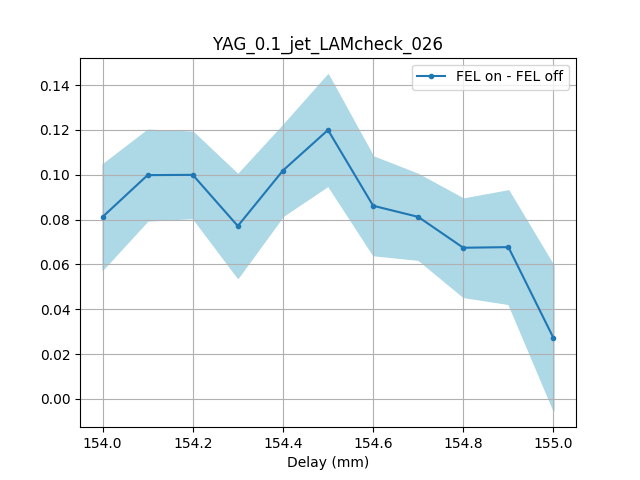

In [39]:
# Plot pump probe signal as a function of delay (stage mm)
savedir = "/das/work/p17/p17569/Beamline/"

print(Delay_x)
plt.figure()
plt.plot(Delay_x, laser_diff, label="FEL on - FEL off",marker='.')

low_err= (-np.log10(laser_pumped_norm / laser_unpumped_norm) ) - (np.sqrt((err_laser_pumped_norm/laser_pumped_norm)**2+(err_laser_unpumped_norm/laser_unpumped_norm)**2))
high_err= (-np.log10(laser_pumped_norm / laser_unpumped_norm) ) + (np.sqrt((err_laser_pumped_norm/laser_pumped_norm)**2+(err_laser_unpumped_norm/laser_unpumped_norm)**2))
plt.fill_between(np.squeeze(Delay_x), low_err, high_err, color='lightblue')
plt.title("YAG_0.1_jet_LAMcheck_026")
plt.xlabel("Delay (mm)")
plt.legend(loc="best")
plt.grid()
plt.show()
plt.savefig(savedir + 'LAMcheck_026')

<IPython.core.display.Javascript object>


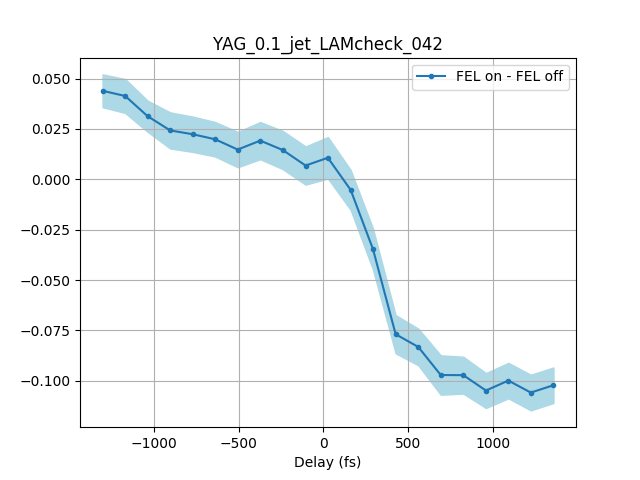

In [16]:
# Plot pump probe signal as a function of time (ps)

plt.figure()
#plt.plot(2*Delay_ps, laser_diff, label="FEL on - FEL off",marker='.')
#plt.plot((2*Delay_ps-98.93)*1000, laser_diff, label="FEL on - FEL off",marker='.')
plt.plot((2*Delay_ps)*1000, laser_diff, label="FEL on - FEL off",marker='.')

low_err= (-np.log10(laser_pumped_norm / laser_unpumped_norm) ) - (np.sqrt((err_laser_pumped_norm/laser_pumped_norm)**2+(err_laser_unpumped_norm/laser_unpumped_norm)**2))
high_err= (-np.log10(laser_pumped_norm / laser_unpumped_norm) ) + (np.sqrt((err_laser_pumped_norm/laser_pumped_norm)**2+(err_laser_unpumped_norm/laser_unpumped_norm)**2))

#plt.fill_between(np.squeeze(2*Delay_ps), low_err, high_err, color='lightblue')
plt.fill_between(np.squeeze((2*Delay_ps)*1000), low_err, high_err, color='lightblue')

plt.title("YAG_0.1_jet_LAMcheck_042")
plt.xlabel("Delay (fs)")
plt.legend(loc="best")
plt.grid()
plt.show()
#plt.savefig('Timescan_7_diode')

In [124]:
Delay_mm_6 = Delay_x.copy()
Delay_ps_6 = Delay_ps.copy()
laser_diff_6 = laser_diff.copy()

<IPython.core.display.Javascript object>


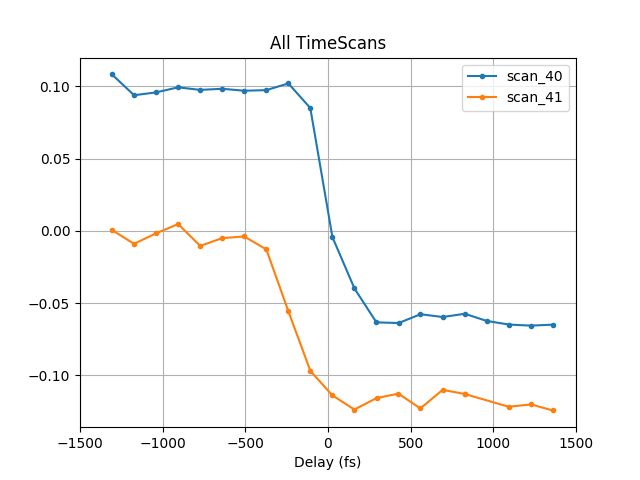

In [73]:
plt.figure()

#plt.plot((2*Delay_ps_6)*1000, laser_diff_6,label="scan_6", marker='.')
#plt.plot((2*Delay_ps_10)*1000, laser_diff_10,label="scan_10", marker='.')
#plt.plot((2*Delay_ps_11)*1000, laser_diff_11,label="scan_11", marker='.')
#plt.plot((2*Delay_ps_12)*1000, laser_diff_12,label="scan_12", marker='.')
#plt.plot((2*Delay_ps_13)*1000, laser_diff_13,label="scan_13_OFF", marker='.')
#plt.plot((2*Delay_ps_16)*1000, laser_diff_16,label="scan_16", marker='.')
#plt.plot((2*Delay_ps_15)*1000, laser_diff_15,label="scan_15", marker='.')
#plt.plot((2*Delay_ps_18)*1000, laser_diff_18,label="scan_18", marker='.')
#plt.plot((2*Delay_ps_23)*1000, laser_diff_23,label="scan_23", marker='.')
#plt.plot((2*Delay_ps_24)*1000, laser_diff_24,label="scan_24", marker='.')
#plt.plot((2*Delay_ps_25)*1000, laser_diff_25,label="scan_25", marker='.')
#plt.plot((2*Delay_ps_33)*1000, laser_diff_33,label="scan_33", marker='.')
plt.plot((2*Delay_ps_40)*1000, laser_diff_40,label="scan_40", marker='.')
plt.plot((2*Delay_ps_41)*1000, laser_diff_41,label="scan_41", marker='.')


plt.title("All TimeScans")
plt.xlabel("Delay (fs)")
plt.legend(loc="best")
plt.xlim([-1500, 1500])
plt.grid()
plt.show()
#plt.savefig('Timescans_all_diode')

<IPython.core.display.Javascript object>


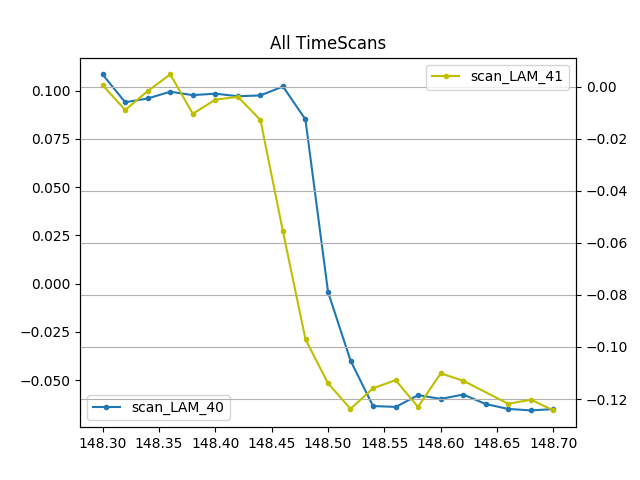

<function print>

In [74]:
#plt.figure()
fig, ax1 = plt.subplots()

#ax1.plot(Delay_mm_2, laser_diff_2,label="scan_2", marker='.')
#ax1.plot(Delay_mm_6, laser_diff_6,label="scan_LAM_6", marker='.')
#ax1.plot(Delay_mm_10, laser_diff_10,label="scan_LAM_10", marker='.')
#ax1.plot(Delay_mm_11, laser_diff_11,label="scan_LAM_11", marker='.')
#ax1.plot(Delay_mm_12, laser_diff_12,label="scan_LAM_12", marker='.')
#ax1.plot(Delay_mm_13, laser_diff_13,label="scan_LAM_13off", marker='.')
#ax1.plot(Delay_mm_14, laser_diff_14,label="scan_LAM_14off", marker='.')
#ax1.plot(Delay_mm_18, laser_diff_18,label="scan_LAM_18", marker='.')

ax1.plot(Delay_mm_40, laser_diff_40,label="scan_LAM_40", marker='.')

ax1.legend(loc="lower left")


ax2 = ax1.twinx()

ax2.plot(Delay_mm_41, laser_diff_41,label="scan_LAM_41", marker='.', color = 'y')
ax2.legend(loc=0)

#plt.xlim([155.3, 155.7])
plt.title("All TimeScans")
plt.xlabel("Delay (mm)")

plt.grid()
plt.show()
print 
#plt.savefig('Timescans_all_diode')

In [18]:
#time_zero = 155.495            #this is in mm from the delay scans
#time_zero = 155.52            #this is in mm from the delay scans
#time_zero = 147.156            #this is in mm from the delay scans
time_zero = 148.463            #this is in mm from the delay scans

desidered_delay = 2           #choose this in ps

delay_to_set = (100/(2*333))*desidered_delay + time_zero        #factor of 2 because of the delay stage

desidered_delay + time_zero
print ("To be at",desidered_delay,"ps, put the laser pump delay stage to",np.round(delay_to_set,4),"mm")

To be at 2 ps, put the laser pump delay stage to 148.7633 mm


In [107]:
def errfunc(x, a, b, c, d):
    return a + b*erf((c-x)*np.sqrt(np.log(2))/(np.abs(d)))

In [108]:
parameters,extras = curve_fit(errfunc, Delay_mm_3, laser_diff_3, p0 = [0.10, 10, 155.5, -0.1])

In [109]:
parameters

array([ 6.16298590e-03,  4.69987605e-02,  1.55501478e+02, -7.52489227e-03])

In [110]:
print("Position t0 =",np.abs(np.round(parameters[2],3)),"mm")
print("Width =",np.abs(np.round(parameters[3],3)),"mm")

Position t0 = 155.501 mm
Width = 0.008 mm


<IPython.core.display.Javascript object>


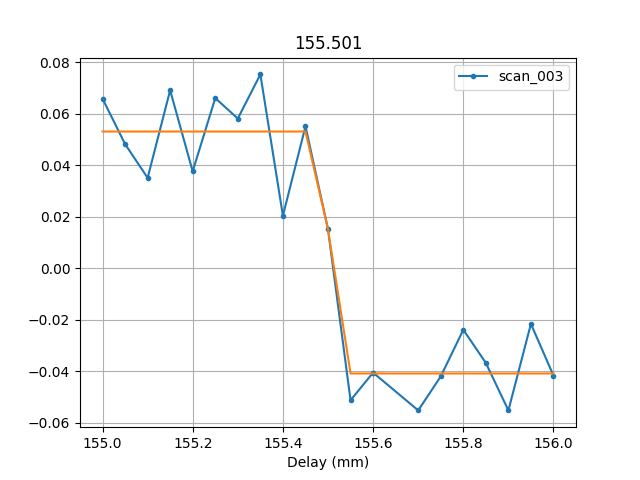

In [111]:
savedir = "/das/work/p17/p17569/Beamline/"

plt.figure()

plt.plot(Delay_mm_3, laser_diff_3, label="scan_003",marker='.')
plt.plot(Delay_mm_3, errfunc(Delay_mm_3,*parameters))

#low_err= signal_norm - err_signal_norm
#high_err= signal_norm + err_signal_norm

#plt.fill_between(position, low_err, high_err, color='lightblue')
plt.title(np.round(parameters[2], 3) )
plt.grid()
plt.xlabel("Delay (mm)")
plt.legend(loc="best")
plt.show()
plt.savefig(savedir + 'scan_LAM_003')

In [33]:
#savedir = "/das/work/p17/p17589/DataAnalysis/"
savedir = "/das/work/p17/p17569/Beamline/"

h5f = h5py.File(savedir + 'timescan6.h5','w')
#h5f = h5py.File(savedir + 'timeScan_3_BS.h5','w')

#h5f.create_dataset('Delay_BS', data = Delay_x)
#h5f.create_dataset('Energy_BS', data = Energy_x)
#h5f.create_dataset('XAS_on', data = XAS_on)
#h5f.create_dataset('err_XAS_on', data = err_XAS_on)
#h5f.create_dataset('XAS_off', data = XAS_off)
#h5f.create_dataset('err_XAS_off', data = err_XAS_off)
#h5f.create_dataset('Izero_on', data = Izero_on)
#h5f.create_dataset('err_Izero_on', data = err_Izero_on)
#h5f.create_dataset('Izero_off', data = Izero_off)
#h5f.create_dataset('err_Izero_off', data = err_Izero_off)

h5f.create_dataset('YAG_effect', data = laser_diff)


h5f.close()

OSError: Unable to create file (unable to open file: name = '/sf/alvra/data/p17569/res/timescan6.h5', errno = 30, error message = 'Read-only file system', flags = 13, o_flags = 242)

In [ ]:
nshots = pulse_ids.size
LAM_stage_slim = []
PALM_slim = []
pulse_id_slim = []
n_ok = 0
for i in range(nshots):
    LAM_loop = BS_file[channel_LAM_delaystage][i]
    PALM_loop = BS_file[channel_PALM_eTOF][i][:]
    Pulseids_loop = BS_file[channel_pulse_ids][i]
    if FEL_on_off[i]:
        LAM_stage_slim.append(LAM_loop)
        PALM_slim.append(PALM_loop)
        pulse_id_slim.append(Pulseids_loop)
        n_ok +=1

print (n_ok)
LAM_stage_slim = np.array(LAM_stage_slim)
PALM_slim = np.array(PALM_slim)
pulse_id_slim = np.array(pulse_id_slim)

In [86]:
for i in range(10):
    test = "YAG_scan_%s" % i
    print(test)
    

YAG_scan_0
YAG_scan_1
YAG_scan_2
YAG_scan_3
YAG_scan_4
YAG_scan_5
YAG_scan_6
YAG_scan_7
YAG_scan_8
YAG_scan_9


In [83]:
LAM_pos = []
counter = []
for j in range(254,370):
    dummy = h5py.File(DIR + "run000%s.BSREAD.h5" % j)[channel_LAM_stepper][:]
    LAM_pos.append(dummy.mean())
    counter.append(j)
    
LAM_pos = np.array(LAM_pos)
counter = np.array(counter)

'test9'

In [ ]:

plt.figure()
plt.plot(counter, LAM_pos, marker='.')
#plt.plot(pulse_ids-pulse_ids[0], LaserDiode, marker='.')
#plt.title(BS_file)
#plt.xlabel("Pulse IDs")
plt.show()

In [80]:
148.496 - 148.463

0.03300000000001546

In [3]:
3600*12

43200